# IMDB Top 10,000 movies (Updated August 2023)

This data set is taken from [Kaggle](https://www.kaggle.com/datasets/ashutoshdevpura/imdb-top-10000-movies-updated-august-2023)

Here is a short blurb of the dataset given by the author:
> Dive into the intricacies of cinema with this dataset showcasing a comprehensive list of IMDB's top-rated movies. Garner insights from a multitude of factors - from ratings and votes to the financial outcome of the film. This dataset offers an extensive glimpse into the metrics that define a film's success and its place in cinematic history.

## Goal
The goal of this notebook is to become familiar with the dataset by performing some simple EDA and Data Visualization techniques to help me become more familiar with data science and data analysis techniques.

## Step 0: Data Exploration
First let's take a quick look at the dataset.


In [270]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

df = pd.read_csv('data/ibmbtop10k.csv')
df.head()

,title,year,runtime,certificate,genre,director,stars,rating,metascore,votes,gross
0,The Shawshank Redemption,1994,142,R,Drama,"['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",9.3,82.0,2780534,28.34
1,The Godfather,1972,175,R,"Crime, Drama","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",9.2,100.0,1935895,134.97
2,Ramayana: The Legend of Prince Rama,1993,135,PG,"Animation, Action, Adventure","['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",9.2,NaN,12470,NaN
3,The Chaos Class,1975,87,NaN,"Comedy, Drama","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",9.2,NaN,42018,NaN
4,Daman,2022,121,NaN,"Adventure, Drama","['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",9.1,NaN,13372,NaN


In [271]:
# Let's look at number of NaN values in each column
NaN_df = pd.DataFrame({'NaNs': df.isnull().sum()})
print(NaN_df)

             NaNs
title           0
year            0
runtime         0
certificate   356
genre           0
director        0
stars           0
rating          0
metascore    1973
votes           0
gross        2834


About 28% of the data set is missing gross revenue. Thus if we are to incorporat gross year in our visualizations, it is important to note that we have a lot missing. One way to solve it, perhaps, is to set the gross revenue equal to the median of the gross revenues for all movies in that specific year. Let's do that.

## Step 1: Data Cleaning and Wrangling
Some things I noticed while looking at data set:
1. Some extra characters/strings in `year` column. Let's remove these.
2. Fill in Nan for gross revenue
   

In [280]:
# 1. Remove non numeric characters from string in year
def remove_non_numeric_characters(string):
    return re.sub('[^0-9]', '', string)

df['year'] = df['year'].apply(remove_non_numeric_characters)

median_revenue_by_year = df.groupby('year')['gross'].median()
# Iterate through the DataFrame to fill missing gross revenue values
for index, row in df.iterrows():
    if pd.isnull(row['gross']):
        df.at[index, 'gross'] = median_revenue_by_year[row['year']]

df.head()


,title,year,runtime,certificate,genre,director,stars,rating,metascore,votes,gross
0,The Shawshank Redemption,1994,142,R,Drama,"['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",9.3,82.0,2780534,28.34
1,The Godfather,1972,175,R,"Crime, Drama","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",9.2,100.0,1935895,134.97
2,Ramayana: The Legend of Prince Rama,1993,135,PG,"Animation, Action, Adventure","['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",9.2,NaN,12470,24.76
3,The Chaos Class,1975,87,NaN,"Comedy, Drama","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",9.2,NaN,42018,12.48
4,Daman,2022,121,NaN,"Adventure, Drama","['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",9.1,NaN,13372,93.88


## Step 2: EDA and Data Visualization

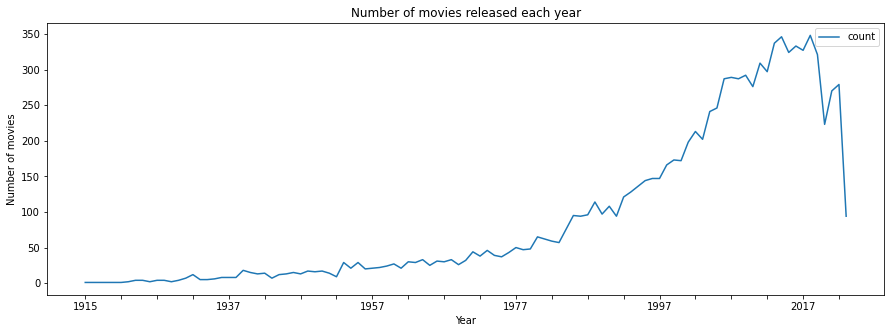

In [273]:
# Line graph to visualize number of movies released each year.
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

movies_released = df.groupby('year').size().reset_index(name='count')   
movies_released.plot(kind='line', x='year', y='count', ax=axes) 
plt.xticks(np.arange(1915 - 1915, 2023 - 1915, 5))
plt.title('Number of movies released each year')
plt.ylabel('Number of movies')
plt.xlabel()
plt.show()

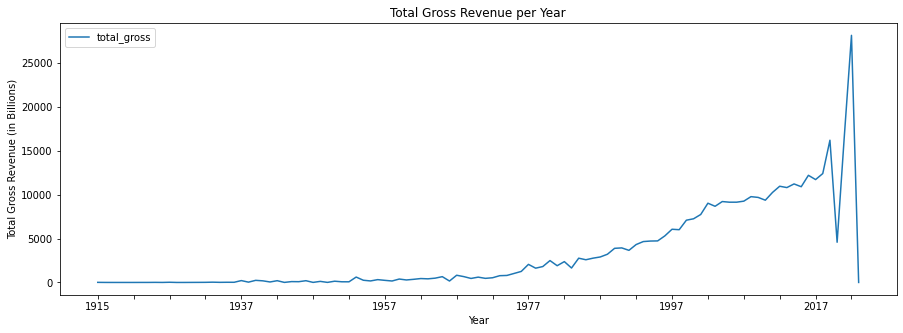

In [285]:
# Line graph to graph gross revenue per year for the top 10,000 movies
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

movies_released = df.groupby('year')['gross'].sum().reset_index(name='total_gross')   
movies_released.plot(kind='line', x='year', y='total_gross', ax=axes) 
plt.xticks(np.arange(1915 - 1915, 2023 - 1915, 5))
plt.title('Total Gross Revenue per Year')
plt.ylabel('Total Gross Revenue (in Billions)')
plt.xlabel('Year')
plt.show()

We see that total revenue growth increases. However, it seems that our method fill out gross revenue is still impacted by the missing gross values. Perhaps it may be better just to remove those data sources, or update our data set.

   year  mean
0  1915   6.2
1  1916   7.7
2  1919   7.2
3  1920   8.0
4  1921   8.0


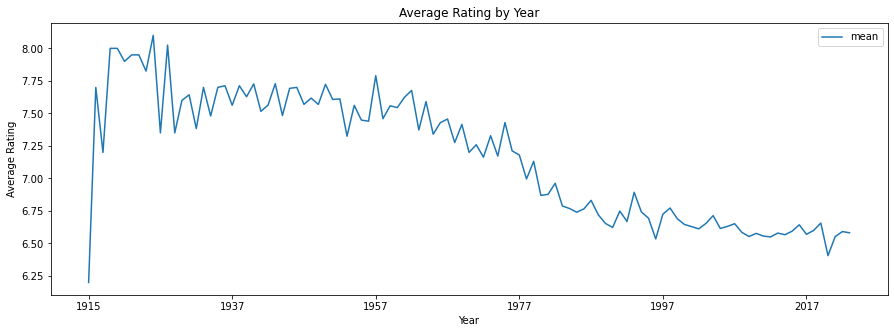

In [289]:
# Let's graph average rating score by year for the top 10,000 movies
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
ave_rating_by_year = df.groupby('year')['rating'].mean().reset_index(name='mean')   
print(movies_released.head())
ave_rating_by_year.plot(kind='line', x='year', y='mean', ax=axes) 
# plt.xticks(np.arange(1915 - 1915, 2023 - 1915, 5))
plt.title('Average Rating by Year (out of 10)')
plt.ylabel('Average Rating')
plt.xlabel('Year')
plt.show()

Wow, movies have gotten worse recently.

Total number of unique genres:  39


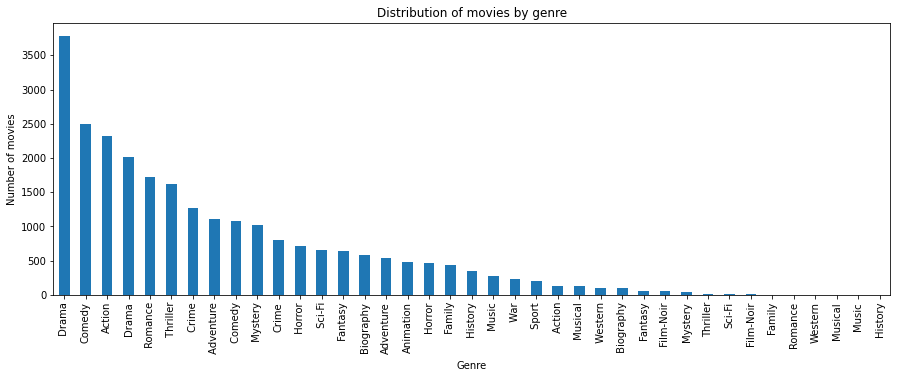

In [274]:
# Bar chart to visualize distribution of movies by genre
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

all_genres = [genre for genres in df['genre'].str.split(',') for genre in genres]
genre_counts = pd.Series(all_genres).value_counts()
print('Total number of unique genres: ', len(genre_counts))
genre_counts.plot(kind='bar', ax=axes)

plt.title('Distribution of movies by genre')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.show()

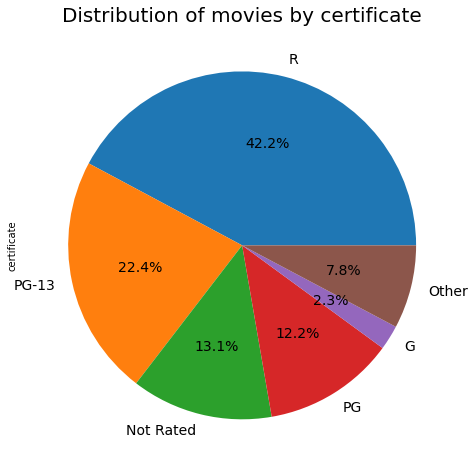

In [275]:
# Pie chart to visualize the distribution of movies by certificate
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.set_facecolor('#FFFFFF')

certificate_counts = df['certificate'].value_counts()

# Label others for better visualization
threshold = 200 # 5%
main_genres = certificate_counts[certificate_counts >= threshold].index
other_genres = certificate_counts[certificate_counts < threshold]
genre_counts_combined = certificate_counts.copy()
genre_counts_combined = genre_counts_combined[main_genres]
genre_counts_combined['Other'] = other_genres.sum()
genre_counts_combined.plot(kind='pie', y='count',  ax=axes, autopct='%1.1f%%', shadow=False, legend = False, fontsize=14)

plt.title('Distribution of movies by certificate', fontsize=20)
plt.show()

From this we can see that the data set is missing some certifications, and not all certifications may be standardized.

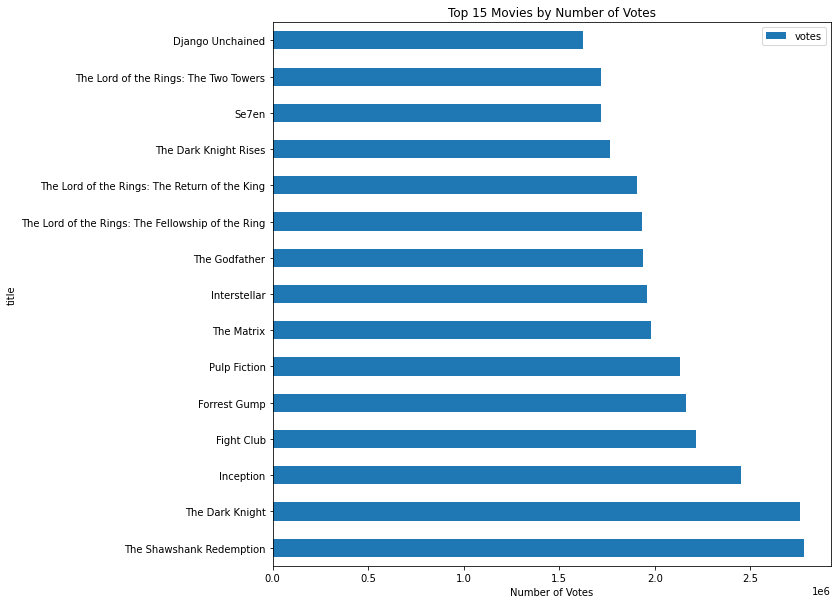

In [276]:
# Order by number of votes
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
votes = df.sort_values('votes', ascending=False)
votes[:15].plot(kind='barh', x='title', y='votes', ax=axes)
plt.xlabel('Number of Votes')
plt.title('Top 15 Movies by Number of Votes')
plt.show()

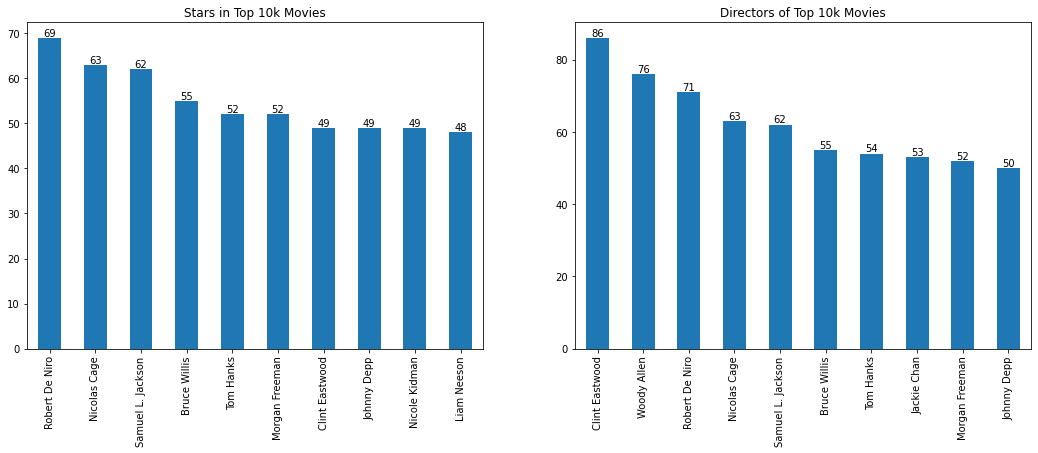

In [277]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Stars that appear in the most movies in top 10k movies
import ast
# Convert the string representation of lists to actual lists
stars_col = df['stars'].apply(ast.literal_eval)
all_stars = [star for stars in stars_col for star in stars]
star_counts = pd.Series(all_stars).value_counts()
star_counts[:10].plot(kind='bar', ax=axes[0], title='Stars in Top 10k Movies')

# Directors that appear in the most movies in top 10k movies
directors_col = df['director'].apply(ast.literal_eval)
all_directors = [director for directors in directors_col for director in directors]
director_counts = pd.Series(all_directors).value_counts()
director_counts[:10].plot(kind='bar', ax=axes[1], title='Directors of Top 10k Movies')

axes[0].bar_label(axes[0].containers[0])
axes[1].bar_label(axes[1].containers[0])
plt.show()

del all_stars, star_counts, all_directors, director_counts

Wow, many stars that are in top 10 are also in top 10 movie directors. Seems like a strong correlation. Movie director's playing themselves or stars becoming movie directors? Perhaps, we can see the popularity of movie actors by year by seeing how many movies the appeared in.

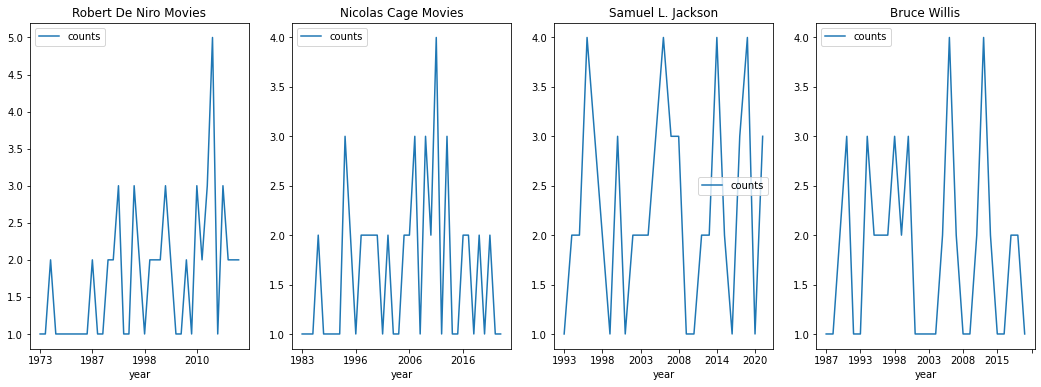

In [278]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))

stars_occurances1 = df[df['stars'].str.contains('Robert De Niro')]
stars_occurances1_by_year = stars_occurances1.groupby('year').size().reset_index(name='counts')
stars_occurances1_by_year.plot(kind='line', x='year', y='counts', title='Robert De Niro Movies', ax=axes[0])

stars_occurances2 = df[df['stars'].str.contains('Nicolas Cage')]
stars_occurances2_by_year = stars_occurances2.groupby('year').size().reset_index(name='counts')
stars_occurances2_by_year.plot(kind='line', x='year', y='counts', title='Nicolas Cage Movies', ax=axes[1])

stars_occurances3 = df[df['stars'].str.contains('Samuel L. Jackson')]
stars_occurances3_by_year = stars_occurances3.groupby('year').size().reset_index(name='counts')
stars_occurances3_by_year.plot(kind='line', x='year', y='counts', title='Samuel L. Jackson', ax=axes[2])

stars_occurances4 = df[df['stars'].str.contains('Bruce Willis')]
stars_occurances4_by_year = stars_occurances4.groupby('year').size().reset_index(name='counts')
stars_occurances4_by_year.plot(kind='line', x='year', y='counts', title='Bruce Willis', ax=axes[3])

plt.show()

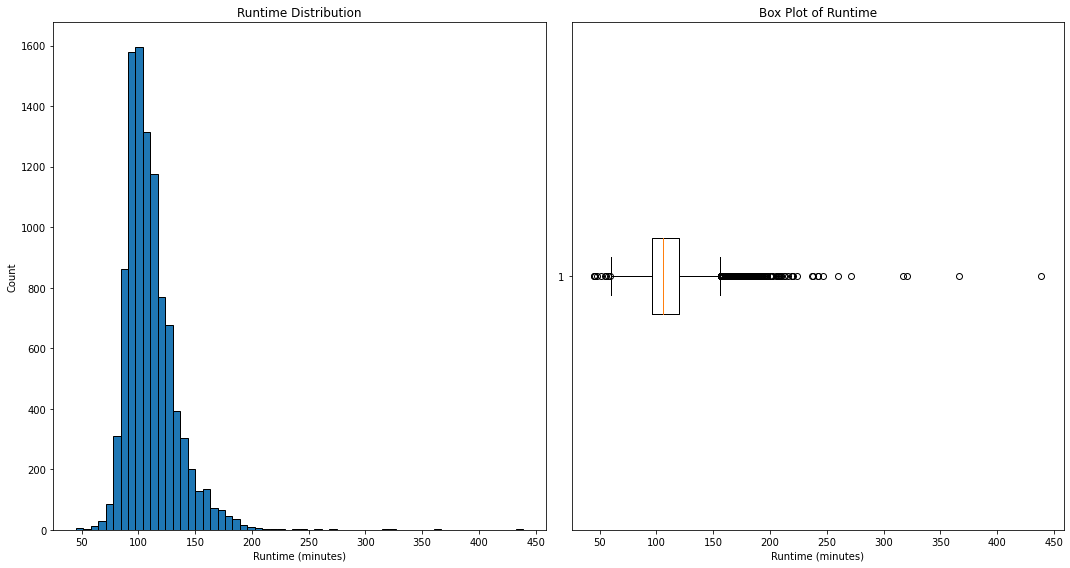

In [279]:
# Lastly, lets look at the distribution of top 10K movies by runtime
# runtime = df['runtime'].dropna()
# plt.hist(runtime, bins=50)
# plt.title('Runtime Distribution')
# plt.xlabel('Runtime (minutes)')
# plt.ylabel('Count')
# plt.show()

# # Use a boxplot to look at the distribution of runtime
# plt.boxplot(runtime)

# Create a new figure and a grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Histogram
ax1.hist(df['runtime'], bins=60, edgecolor='black')
ax1.set_title('Runtime Distribution')
ax1.set_xlabel('Runtime (minutes)')
ax1.set_ylabel('Count')

# Box plot
ax2.boxplot(df['runtime'], vert=False)
ax2.set_title('Box Plot of Runtime')
ax2.set_xlabel('Runtime (minutes)')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

## Step 3. Machine Learning
Let's see how correlated some variables are.

TBD...

## Step 4. Conclusion
Overall, this data set is pretty good. Although it is missing a lot of information such as gross profit, so it's hard to produce any real measurements in gross profit and metascore.


Thanks for reading! Leave any tips and suggestions on what I can do to improve, or different ways to look at this data set.